In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [ ]:
df= pd.read_csv('../csv/after_cleaning/mubawab_tayara_menzili_final.csv')
df.head()

,delegation,superficie,nb_pieces,chambres,salle_de_bains,etage,gouvernorat_ariana,gouvernorat_ben-arous,gouvernorat_la-manouba,gouvernorat_tunis,prix
0,9.0,88.0,3.0,2,1,1,0.0,0.0,0.0,1.0,340000.0
1,23.0,100.0,2.0,2,1,1,0.0,0.0,0.0,1.0,135000.0
2,33.0,152.0,2.0,2,1,1,0.0,0.0,0.0,1.0,680000.0
3,33.0,120.0,2.0,1,1,1,0.0,0.0,0.0,1.0,470000.0
4,28.0,145.0,4.0,3,1,4,0.0,0.0,0.0,1.0,260000.0


**scaling and train test split**

In [22]:
X= df.drop(columns='prix')

y= df['prix']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to the test data (do not fit again!)
X_test_scaled = scaler.transform(X_test)


# Linear Regression

In [24]:
model= LinearRegression()

model.fit(X_train_scaled, y_train)

y_hat= model.predict(X_test_scaled)

In [25]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Train metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display results
print("===== Training Metrics =====")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\n===== Testing Metrics =====")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.4f}")
print(f"R²: {r2_test:.4f}")


===== Training Metrics =====
Mean Absolute Error (MAE): 116891.8294
Root Mean Squared Error (RMSE): 211977.7706
Mean Squared Error (MSE): 44934575212.2366
Mean Absolute Percentage Error (MAPE): 0.3172
R²: 0.6562

===== Testing Metrics =====
Mean Absolute Error (MAE): 114084.9456
Root Mean Squared Error (RMSE): 173899.0116
Mean Squared Error (MSE): 30240866243.7099
Mean Absolute Percentage Error (MAPE): 0.3168
R²: 0.7470


**R² is around 75% , this means that LR model explains about 75% of the variance in apartment prices.
The higher the R², the better the model’s fit to the data.**

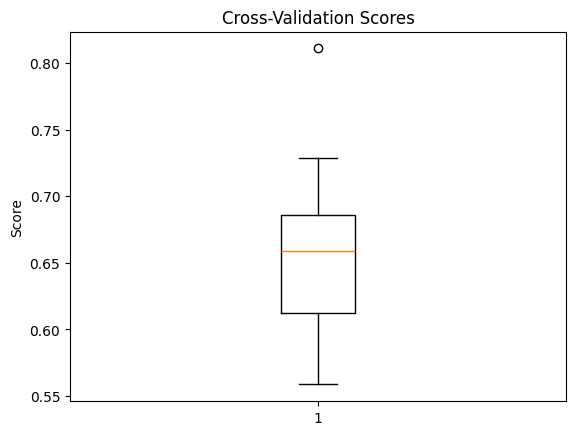

Average CV Score: 0.6599153360034113


In [26]:
cv_scores = cross_val_score(model, X_train, y_train, cv=10)

# Plotting the cross-validation scores
plt.boxplot(cv_scores)
plt.title('Cross-Validation Scores')
plt.ylabel('Score')
plt.show()

print(f'Average CV Score: {cv_scores.mean()}')


**feature importance**

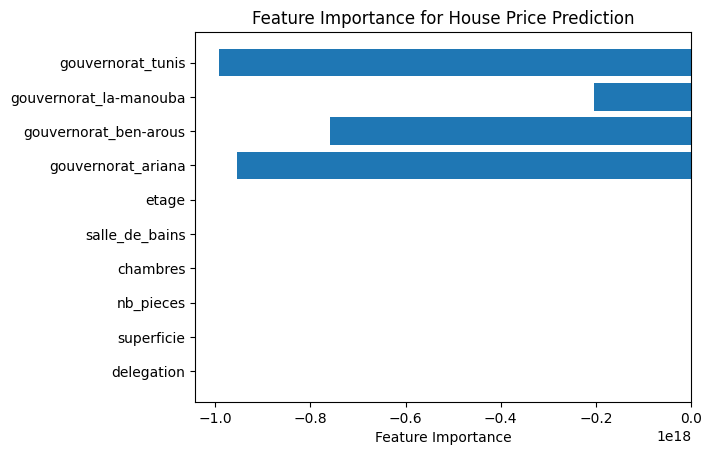

In [27]:

feature_importance = model.coef_
features = X.columns 

plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for House Price Prediction')
plt.show()


**learning curve**

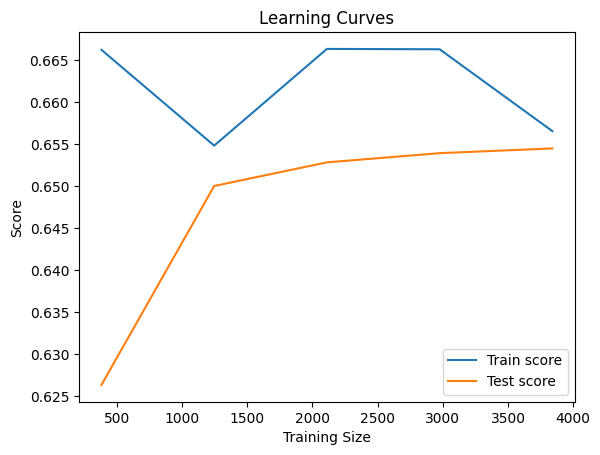

In [28]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()


**compress model**

In [18]:
with open(r"./compressed_models/LR_model.pickle", "wb") as fout:
    pickle.dump(model, fout)


In [19]:
# open pickle file and load
with open(r"./compressed_models/LR_model.pickle", "rb") as fin:
    LR = pickle.load(fin)
# display loaded object
print(LR)


LinearRegression()


In [20]:
LR.predict(X_test_scaled)

array([ 285388.51508963,  394572.51508963,  323532.51508963, ...,
       1081804.51508963,  959820.51508963,  176076.51508963])